In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
sns.set(rc={'figure.figsize':(24, 15)}, font_scale=2)

import os
import sys
sys.path.append('../')
import utils
import synthetic_data_generator as sdg

from tqdm import tqdm
from glob import glob

from pathlib import Path

In [9]:
def get_alerts_df(input_dir, mode):
    '''
    Return a list of the alert dataframes for the specified mode found under the `input_dir`
    '''
    alerts_df_list = []
    for dir in os.listdir(input_dir):
        alerts_df_path = input_dir + dir + '/evaluation/' + mode + '/alerts_df.pickle'
        if Path(alerts_df_path).is_file():
            alert_df = pd.read_pickle(input_dir + dir + '/evaluation/' + mode + '/alerts_df.pickle')
            alerts_df_list.append(alert_df)
        else:
            print(alerts_df_path, "Not Found")
    return alerts_df_list

In [10]:
# Construct the alerts_dfs_dict
alerts_dfs_dict = {}
input_dir = '../streaming_data/synthetic_data/all_outlier_types/'
modes = ['future_prediction_fixed_bandwidth', 'future_prediction_isj', 'future_prediction_fixed_bandwidth_adj_local_min', 'future_prediction_isj_adj_local_min']
mode_to_mode_label = {
    'future_prediction_isj': 'ISJ',
    'future_prediction_fixed_bandwidth': 'Fixed Band.',
    'future_prediction_fixed_bandwidth_adj_local_min': 'Fixed Band. (Adj. Local Min)',
    'future_prediction_isj_adj_local_min': 'ISJ (Adj. Local Min)'
}
eval_measures=['range_based_precision@k', 'range_based_recall@k', 'range_based_f1_score@k', 'range_based_precision@k_outlier_bounds', 'range_based_recall@k_outlier_bounds', 'range_based_f1_score@k_outlier_bounds']

for mode in modes:
    alerts_dfs_dict[mode] = get_alerts_df(input_dir, mode)

../streaming_data/synthetic_data/all_outlier_types/variable_inj_region_length/evaluation/future_prediction_fixed_bandwidth/alerts_df.pickle Not Found
../streaming_data/synthetic_data/all_outlier_types/variable_inj_region_length/evaluation/future_prediction_isj/alerts_df.pickle Not Found
../streaming_data/synthetic_data/all_outlier_types/variable_inj_region_length/evaluation/future_prediction_fixed_bandwidth_adj_local_min/alerts_df.pickle Not Found
../streaming_data/synthetic_data/all_outlier_types/variable_inj_region_length/evaluation/future_prediction_isj_adj_local_min/alerts_df.pickle Not Found


In [11]:
len(alerts_dfs_dict)

4

In [4]:
num_alerts=9
eval_df_columns = ['mode', 'alert_num'] + eval_measures
eval_df = pd.DataFrame(columns=eval_df_columns)
for mode in alerts_dfs_dict:
    for df in alerts_dfs_dict[mode]:
        for i in range(min(len(df.index), num_alerts)):
            row_to_append = [mode_to_mode_label[mode], i+1]
            for eval_measure in eval_measures:
                row_to_append.append(df.loc[i][eval_measure])
            eval_df.loc[len(eval_df.index)] = row_to_append
eval_df

,mode,alert_num,range_based_precision@k,range_based_recall@k,range_based_f1_score@k,range_based_precision@k_outlier_bounds,range_based_recall@k_outlier_bounds,range_based_f1_score@k_outlier_bounds
0,Fixed Band.,1,0.129615,0.958333,0.228347,0.490258,0.950000,0.646752
1,Fixed Band.,2,0.138026,1.000000,0.242571,0.636227,0.972222,0.769131
2,Fixed Band.,3,0.137119,1.000000,0.241170,0.614985,0.979167,0.755478
3,Fixed Band.,4,0.135798,1.000000,0.239124,0.394145,0.992188,0.564173
4,Fixed Band.,5,0.161240,1.000000,0.277703,0.426542,0.993056,0.596760
...,...,...,...,...,...,...,...,...
316,ISJ (Adj. Local Min),4,0.248306,1.000000,0.397829,0.859424,0.995833,0.922614
317,ISJ (Adj. Local Min),5,0.256112,1.000000,0.407785,0.894497,0.996528,0.942760
318,ISJ (Adj. Local Min),6,0.252708,1.000000,0.403459,0.913543,0.988095,0.949358
319,ISJ (Adj. Local Min),7,0.270374,1.000000,0.425660,0.895854,0.989583,0.940389


# ISJ vs. Fixed Bandwidth

In [169]:
boxplot_width=0.4
figures_output_dir='../figures/benchmarking/synthetic_data/'

## Full Bounds

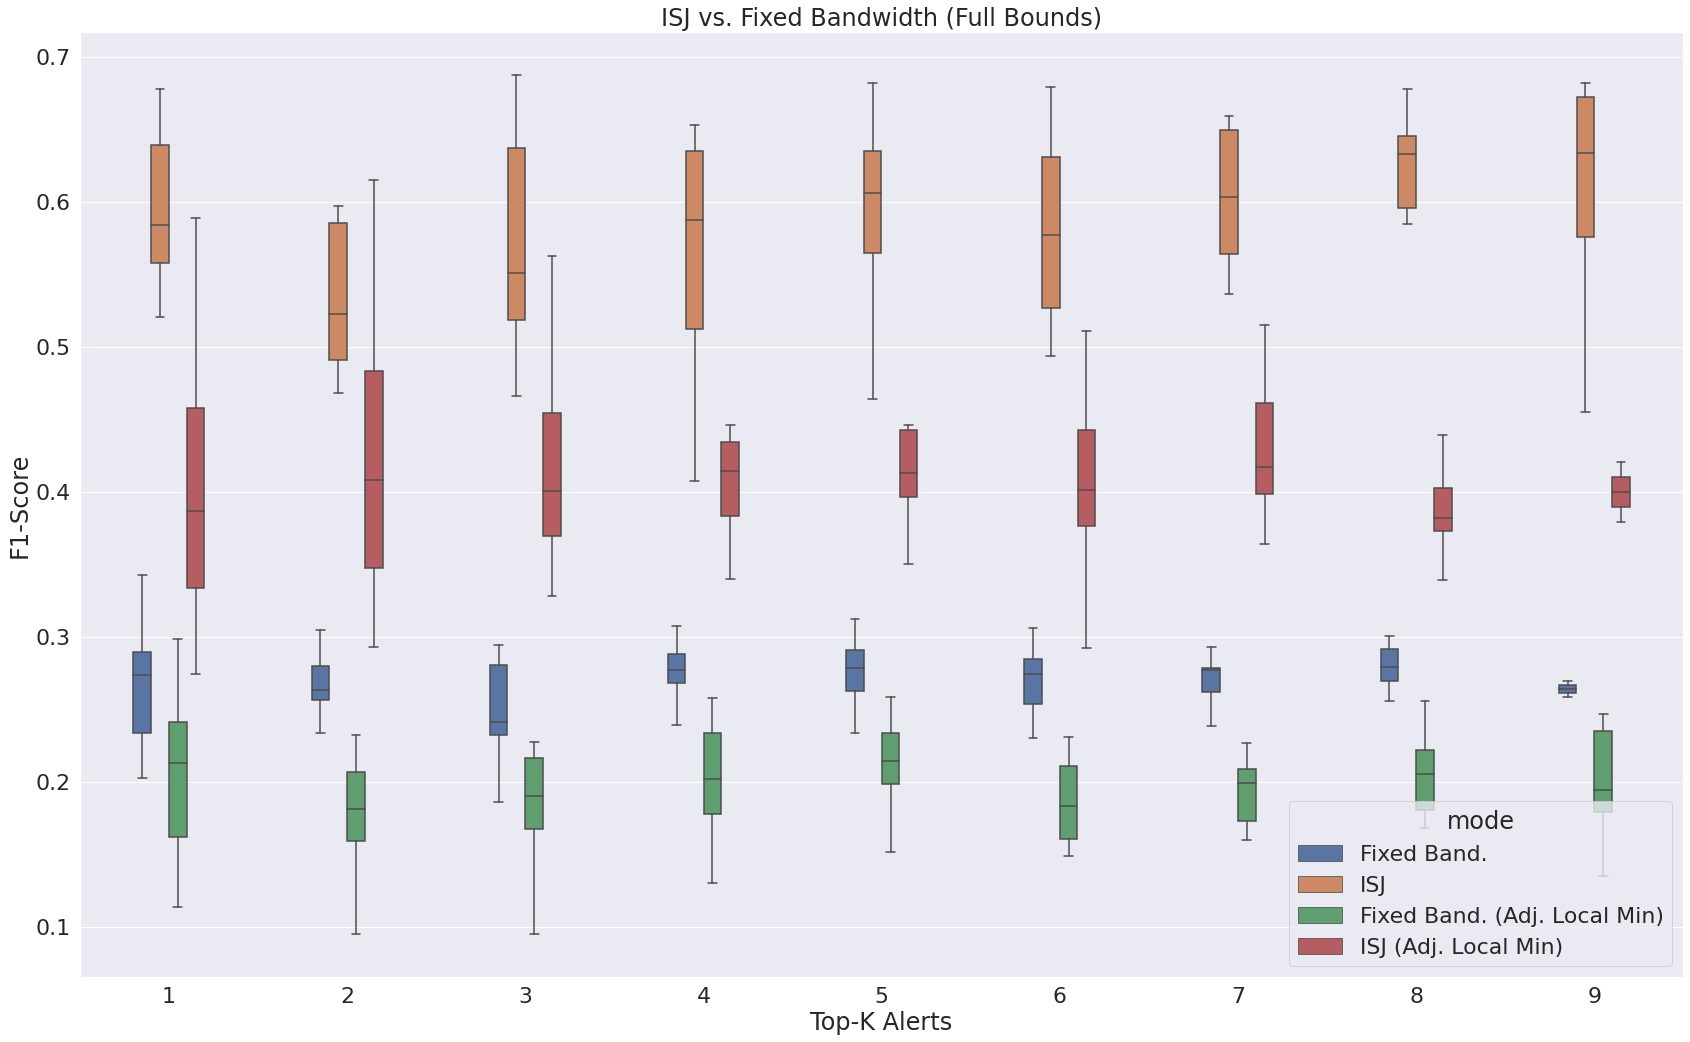

In [170]:
ax = sns.boxplot(x="alert_num", y="range_based_f1_score@k", hue="mode", data=eval_df, showfliers=False, width=boxplot_width)
plt.xlabel("Top-K Alerts");plt.ylabel("F1-Score");plt.title("ISJ vs. Fixed Bandwidth (Full Bounds)");plt.tight_layout()
plt.savefig(figures_output_dir + 'full_bounds_f1_score.svg')

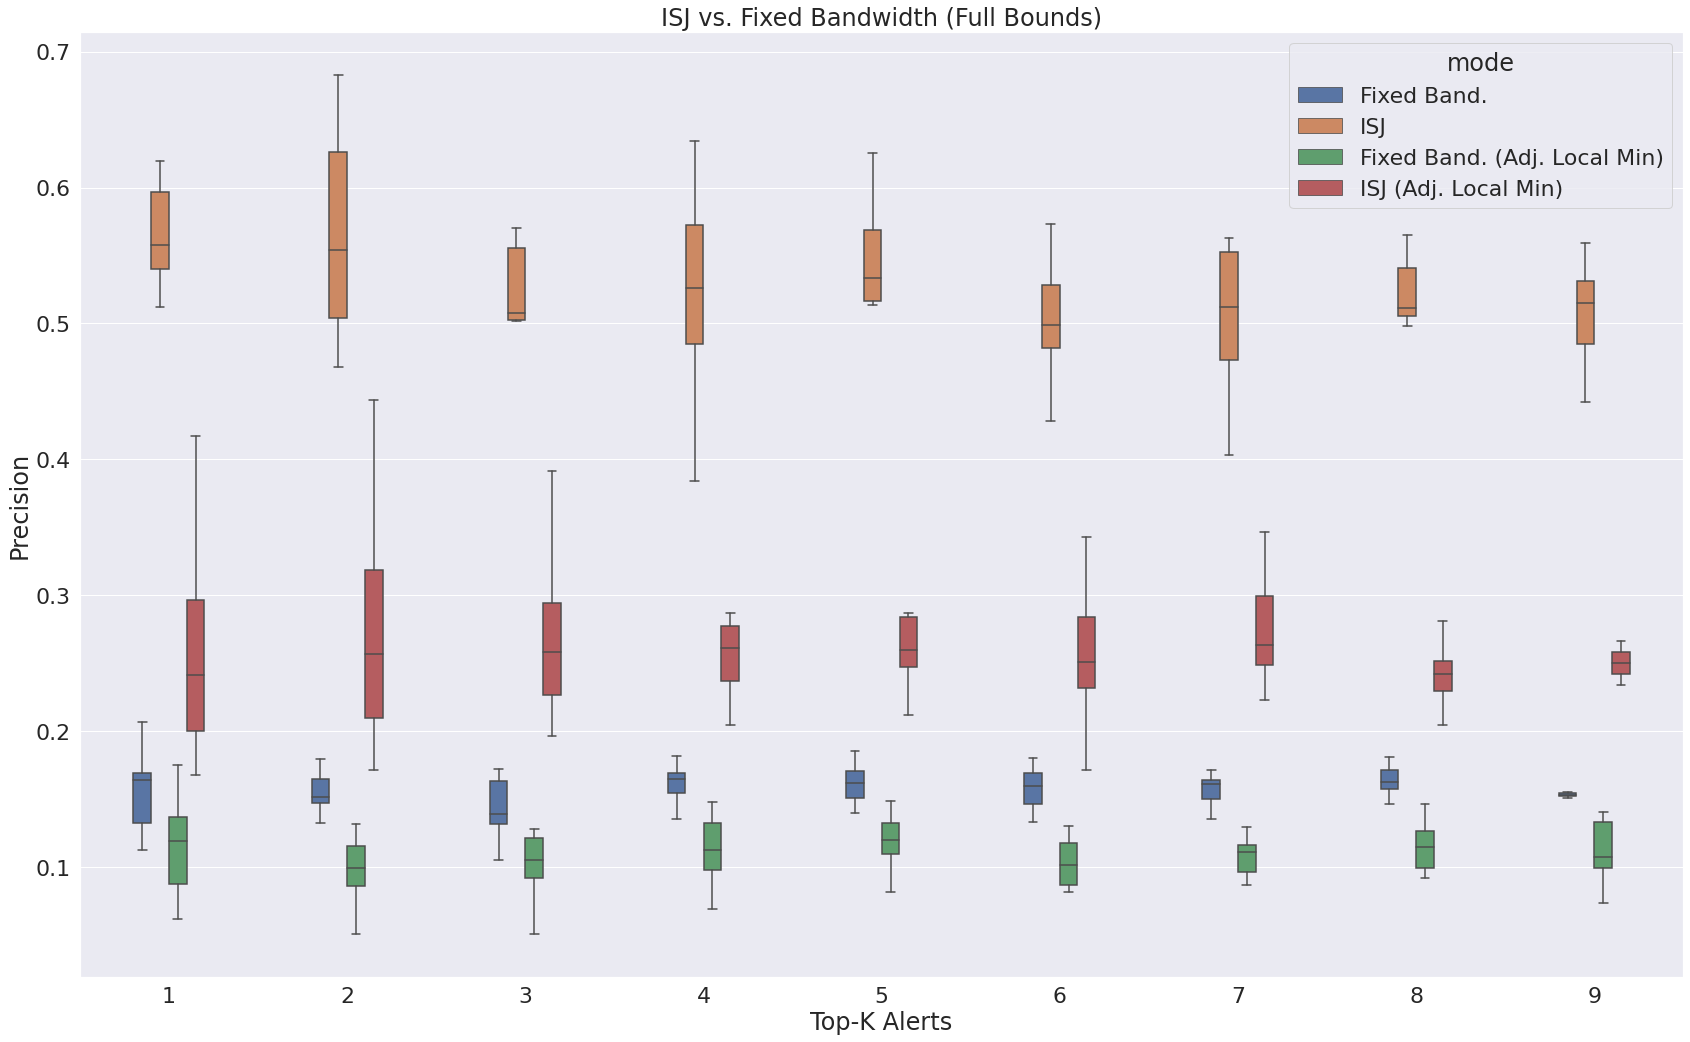

In [171]:
ax = sns.boxplot(x="alert_num", y="range_based_precision@k", hue="mode", data=eval_df, showfliers=False, width=boxplot_width)
plt.xlabel("Top-K Alerts");plt.ylabel("Precision");plt.title("ISJ vs. Fixed Bandwidth (Full Bounds)");plt.tight_layout()
plt.savefig(figures_output_dir + 'full_bounds_precision.svg')

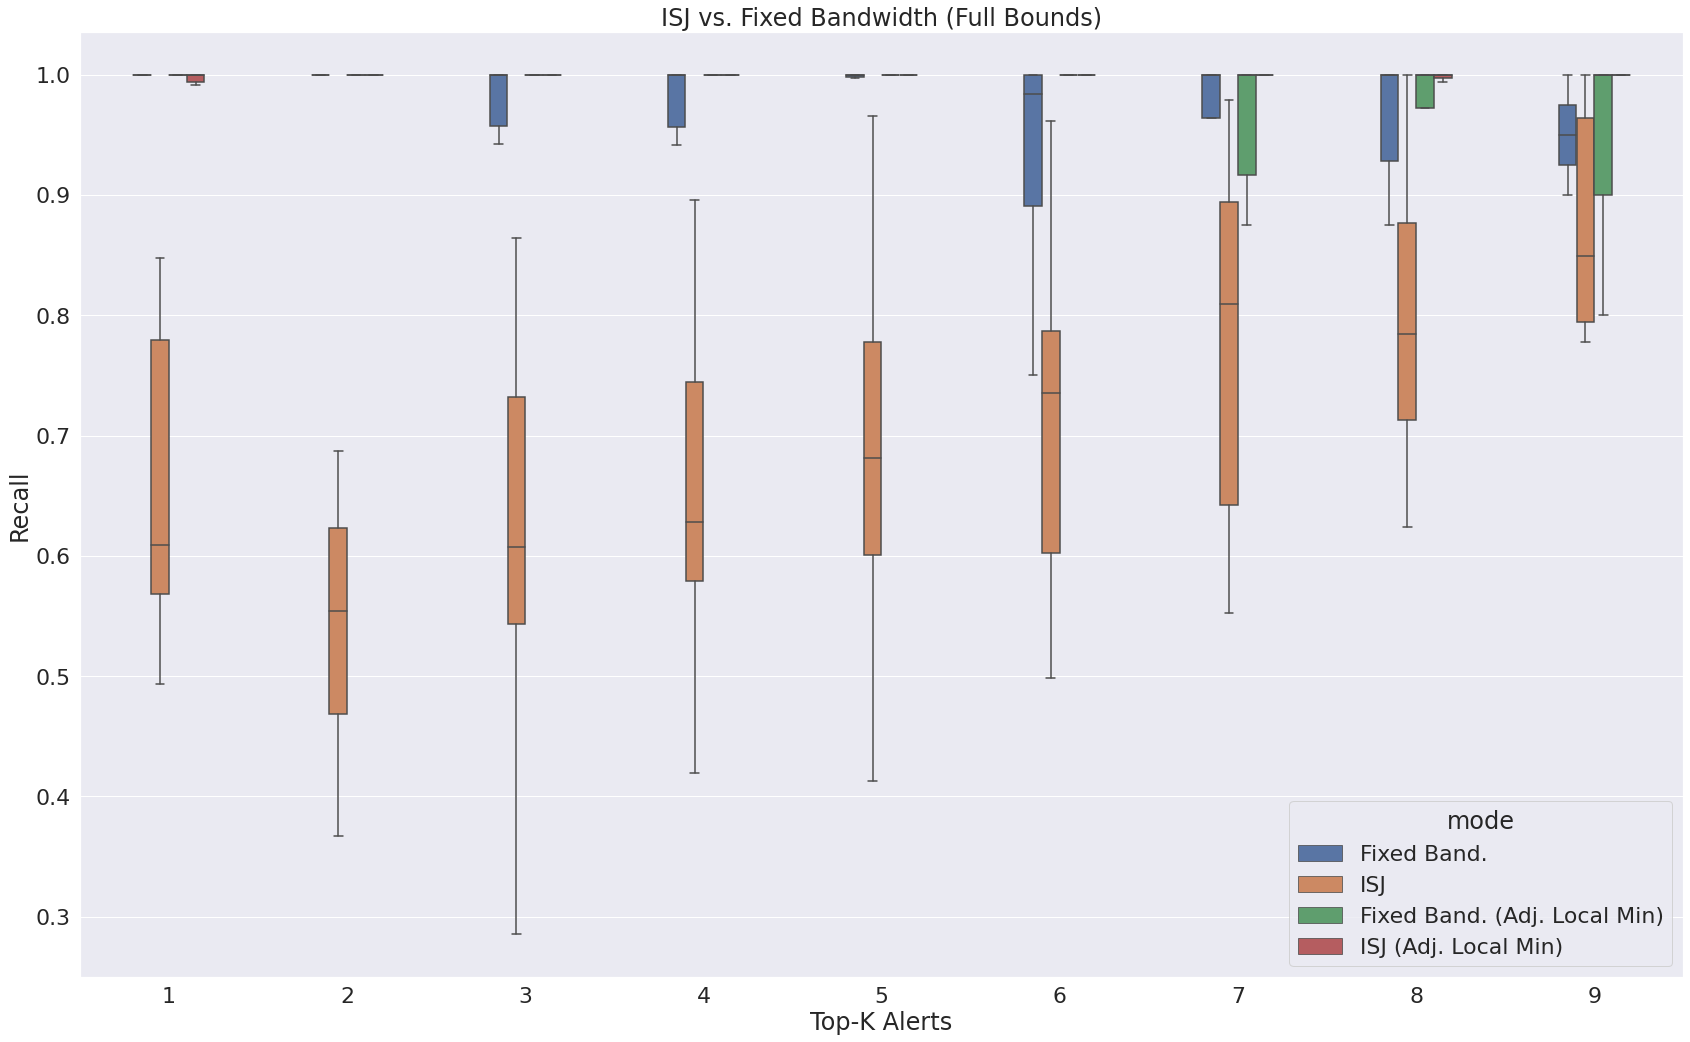

In [172]:
ax = sns.boxplot(x="alert_num", y="range_based_recall@k", hue="mode", data=eval_df, showfliers=False, width=boxplot_width)
plt.xlabel("Top-K Alerts");plt.ylabel("Recall");plt.title("ISJ vs. Fixed Bandwidth (Full Bounds)");plt.tight_layout()
plt.savefig(figures_output_dir + 'full_bounds_recall.svg')

## Outlier Bounds

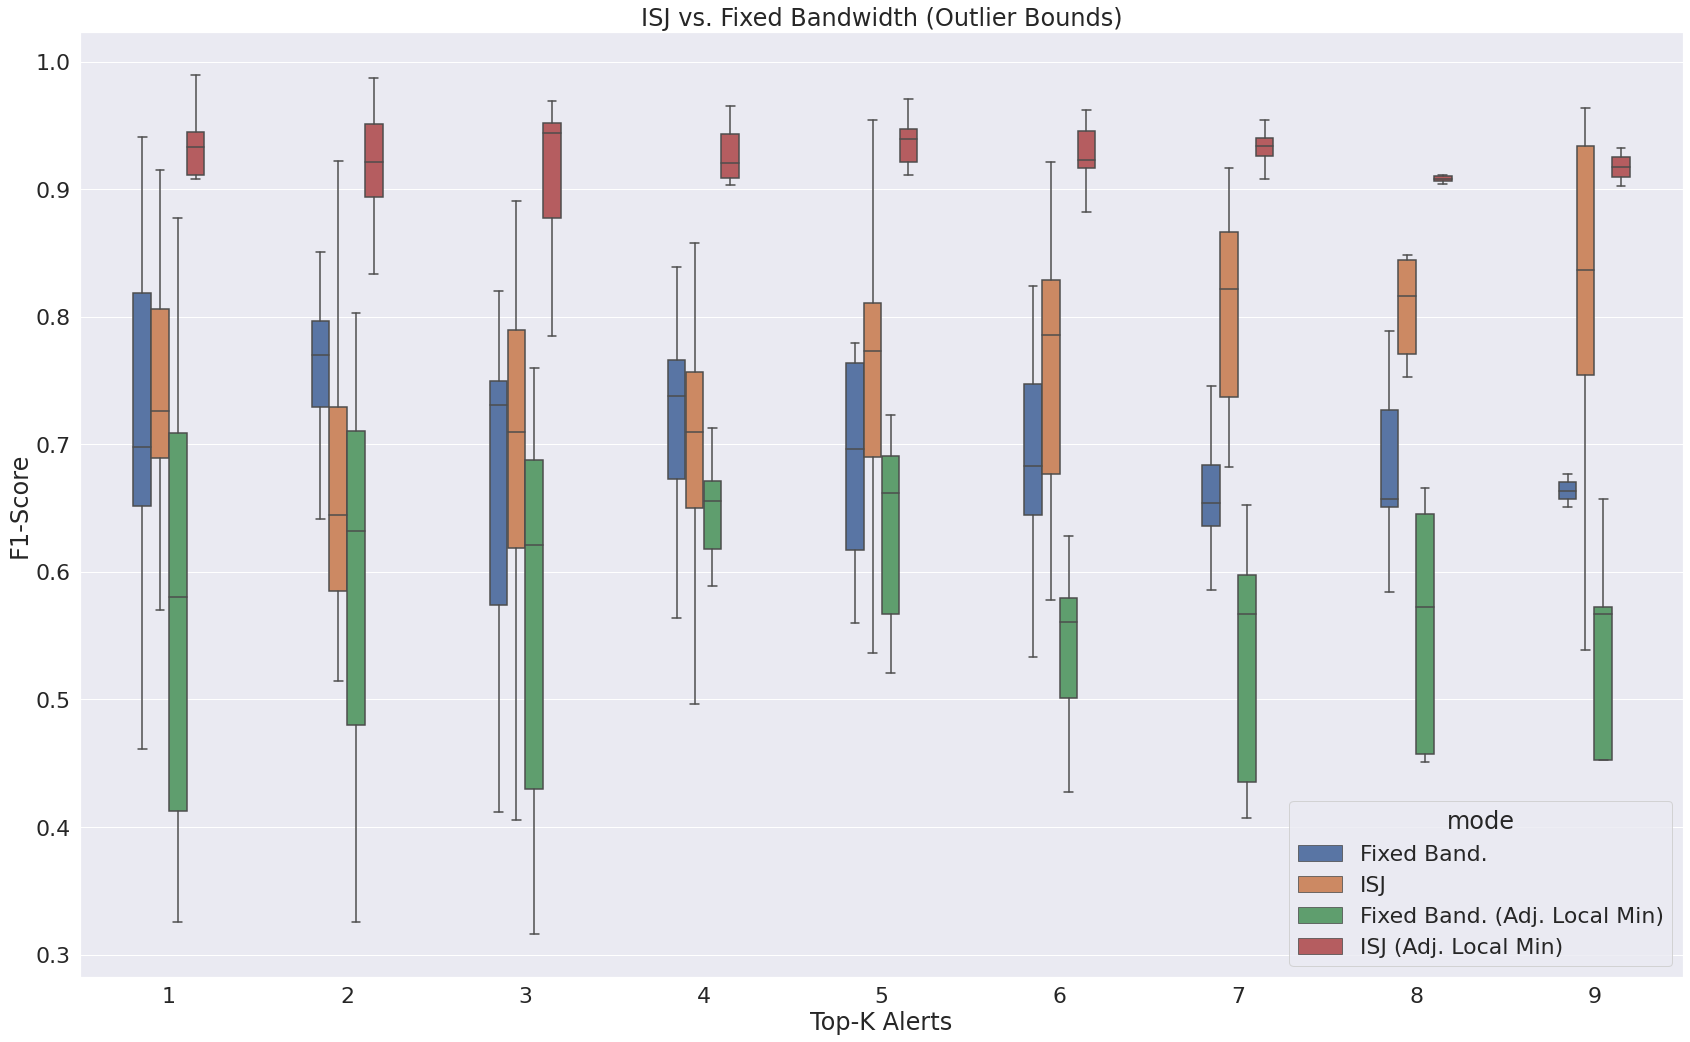

In [173]:
ax = sns.boxplot(x="alert_num", y="range_based_f1_score@k_outlier_bounds", hue="mode", data=eval_df, showfliers=False, width=boxplot_width)
plt.xlabel("Top-K Alerts");plt.ylabel("F1-Score");plt.title("ISJ vs. Fixed Bandwidth (Outlier Bounds)");plt.tight_layout()
plt.savefig(figures_output_dir + 'outlier_bounds_f1_score.svg')

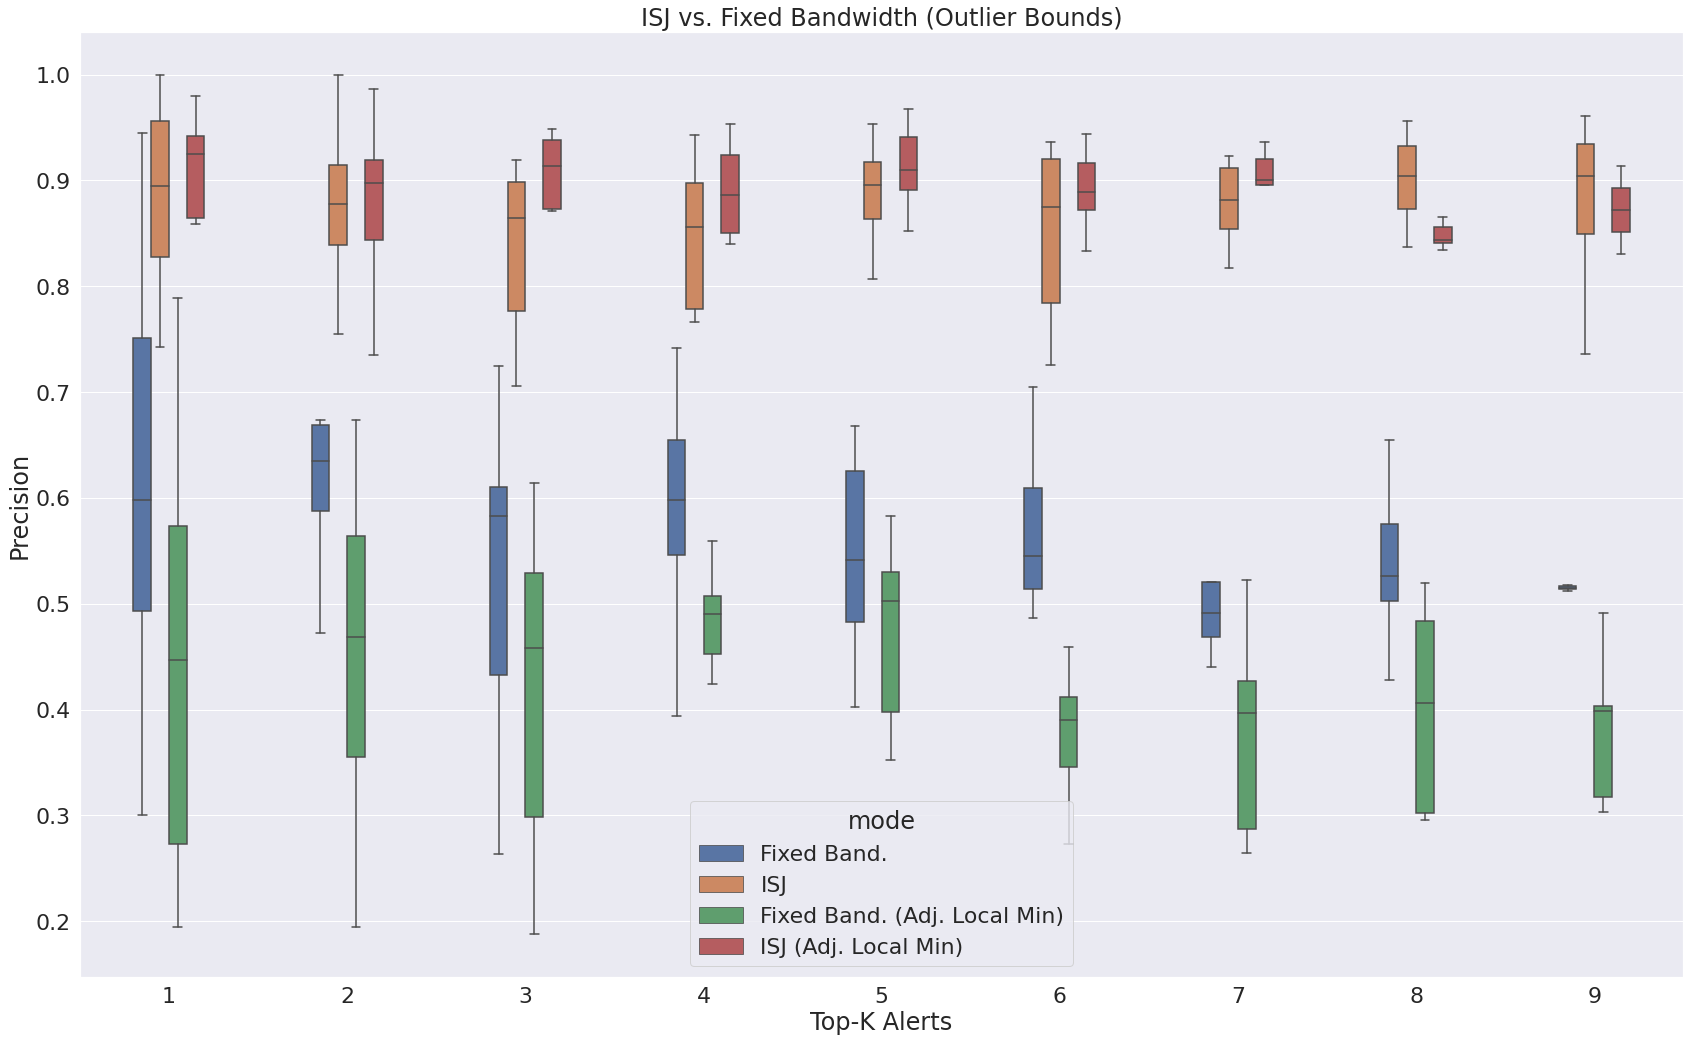

In [174]:
ax = sns.boxplot(x="alert_num", y="range_based_precision@k_outlier_bounds", hue="mode", data=eval_df, showfliers=False, width=boxplot_width)
plt.xlabel("Top-K Alerts");plt.ylabel("Precision");plt.title("ISJ vs. Fixed Bandwidth (Outlier Bounds)");plt.tight_layout()
plt.savefig(figures_output_dir + 'outlier_bounds_precision.svg')

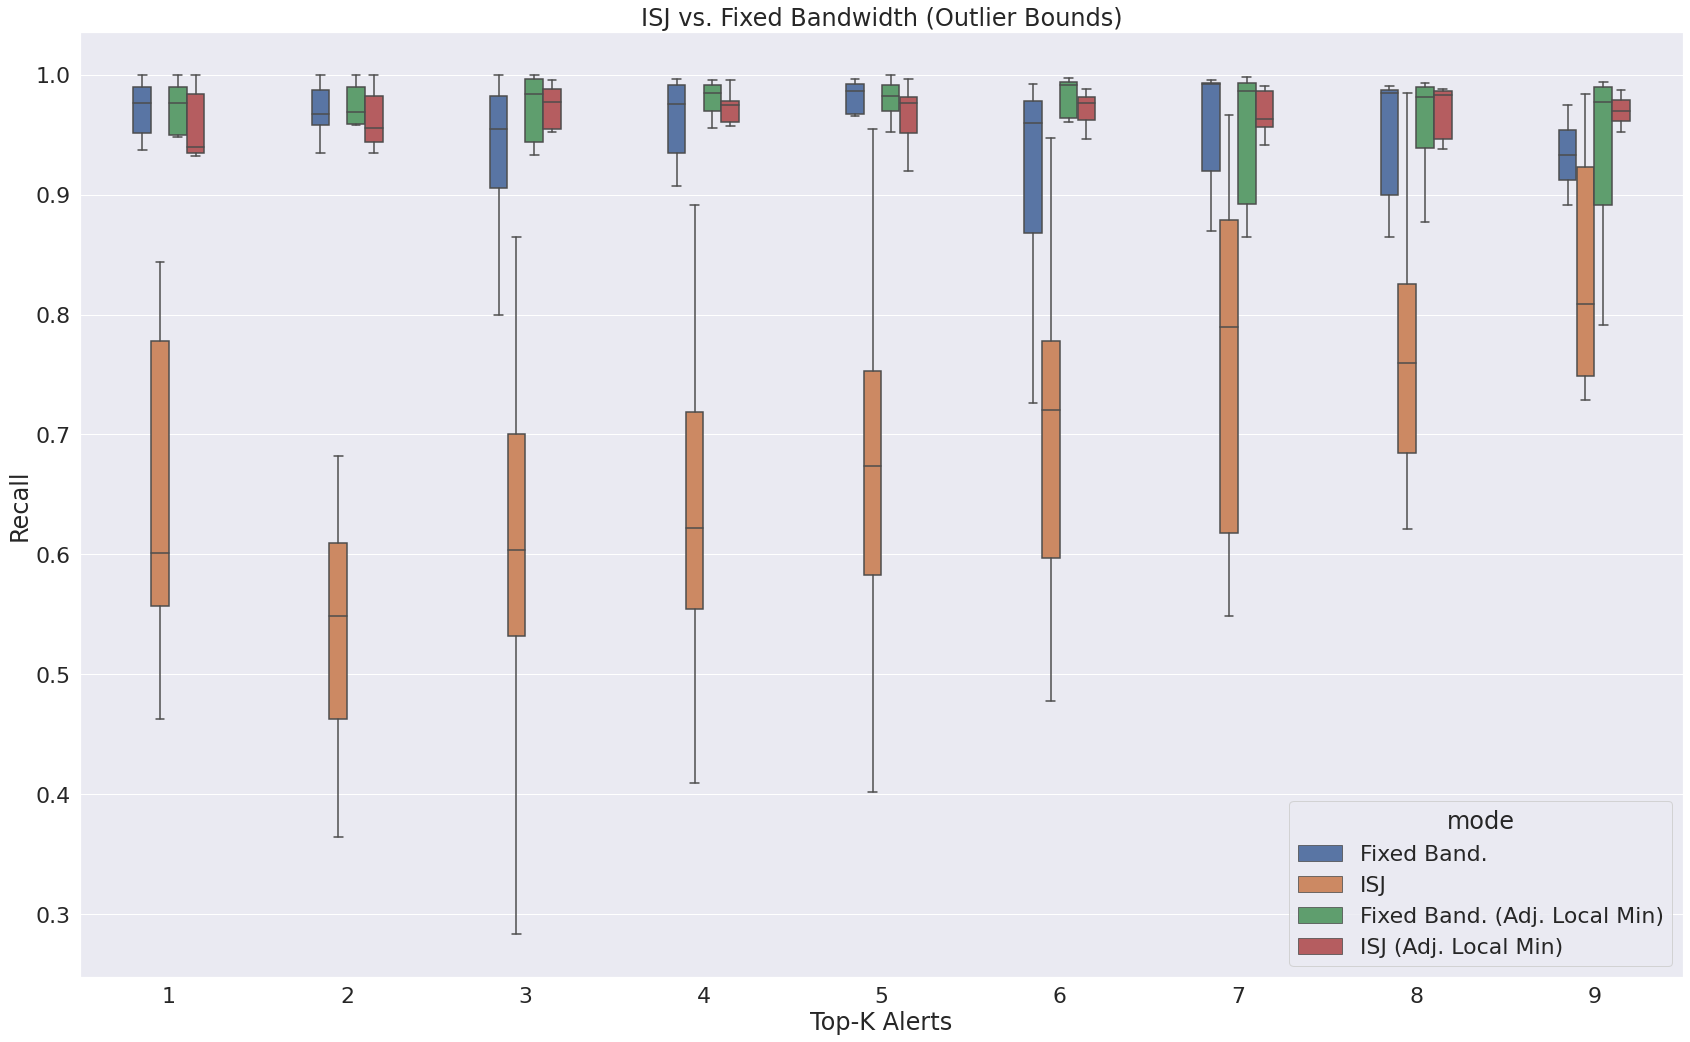

In [175]:
ax = sns.boxplot(x="alert_num", y="range_based_recall@k_outlier_bounds", hue="mode", data=eval_df, showfliers=False, width=boxplot_width)
plt.xlabel("Top-K Alerts");plt.ylabel("Recall");plt.title("ISJ vs. Fixed Bandwidth (Outlier Bounds)");plt.tight_layout()
plt.savefig(figures_output_dir + 'outlier_bounds_recall.svg')

# Overall Evaluation

In [162]:
eval_df_grouped = eval_df.groupby(['mode']).mean()
eval_df_grouped

,range_based_precision@k,range_based_recall@k,range_based_f1_score@k,range_based_precision@k_outlier_bounds,range_based_recall@k_outlier_bounds,range_based_f1_score@k_outlier_bounds
mode,,,,,,
Fixed Band.,0.156354,0.964760,0.268571,0.570141,0.944734,0.702365
Fixed Band. (Adj. Local Min),0.108900,0.971457,0.195194,0.428259,0.951311,0.579536
ISJ,0.528815,0.687100,0.585884,0.862983,0.671783,0.745321
ISJ (Adj. Local Min),0.265192,0.984932,0.414910,0.882153,0.953858,0.915472


In [163]:
eval_df_grouped = eval_df.groupby(['mode']).std()
eval_df_grouped

,range_based_precision@k,range_based_recall@k,range_based_f1_score@k,range_based_precision@k_outlier_bounds,range_based_recall@k_outlier_bounds,range_based_f1_score@k_outlier_bounds
mode,,,,,,
Fixed Band.,0.017793,0.070741,0.027147,0.124128,0.072663,0.098364
Fixed Band. (Adj. Local Min),0.023615,0.069438,0.038883,0.128903,0.074381,0.127603
ISJ,0.068095,0.169255,0.078626,0.080482,0.165626,0.121665
ISJ (Adj. Local Min),0.057545,0.055583,0.070296,0.068746,0.058537,0.056621


# Variable Region Length

In [3]:
# Construct the alerts_dfs_dict
alerts_dfs_dict = {}
input_dir = '../streaming_data/synthetic_data/all_outlier_types/variable_inj_region_length/12_48/'
modes = ['future_prediction_isj', 'future_prediction_isj_adj_local_min']
mode_to_mode_label = {
    'future_prediction_isj': 'ISJ',
    'future_prediction_isj_adj_local_min': 'ISJ (Adj. Local Min)'
}
eval_measures=['range_based_precision@k', 'range_based_recall@k', 'range_based_f1_score@k', 'range_based_precision@k_outlier_bounds', 'range_based_recall@k_outlier_bounds', 'range_based_f1_score@k_outlier_bounds']

for mode in modes:
    alerts_dfs_dict[mode] = get_alerts_df(input_dir, mode)

In [4]:
num_alerts=9
eval_df_columns = ['mode', 'alert_num'] + eval_measures
eval_df = pd.DataFrame(columns=eval_df_columns)
for mode in alerts_dfs_dict:
    for df in alerts_dfs_dict[mode]:
        for i in range(min(len(df.index), num_alerts)):
            row_to_append = [mode_to_mode_label[mode], i+1]
            for eval_measure in eval_measures:
                row_to_append.append(df.loc[i][eval_measure])
            eval_df.loc[len(eval_df.index)] = row_to_append
eval_df

,mode,alert_num,range_based_precision@k,range_based_recall@k,range_based_f1_score@k,range_based_precision@k_outlier_bounds,range_based_recall@k_outlier_bounds,range_based_f1_score@k_outlier_bounds
0,ISJ,1,0.686819,0.583333,0.630860,0.972222,0.565217,0.714847
1,ISJ,2,0.733333,0.554348,0.631401,0.962963,0.518116,0.673734
2,ISJ,3,0.712418,0.545238,0.617717,0.966667,0.509006,0.666868
3,ISJ,4,0.583425,0.663690,0.620975,0.977273,0.610028,0.751167
4,ISJ,5,0.627796,0.600529,0.613860,0.975589,0.565085,0.715649
...,...,...,...,...,...,...,...,...
150,ISJ (Adj. Local Min),5,0.298074,1.000000,0.459256,0.921111,0.982971,0.951036
151,ISJ (Adj. Local Min),6,0.222111,1.000000,0.363488,0.889646,0.972435,0.929200
152,ISJ (Adj. Local Min),7,0.223485,1.000000,0.365325,0.905411,0.979465,0.940983
153,ISJ (Adj. Local Min),8,0.212257,1.000000,0.350185,0.939454,0.982708,0.960594


In [5]:
eval_df_grouped = eval_df.groupby(['mode']).mean()
eval_df_grouped

,range_based_precision@k,range_based_recall@k,range_based_f1_score@k,range_based_precision@k_outlier_bounds,range_based_recall@k_outlier_bounds,range_based_f1_score@k_outlier_bounds
mode,,,,,,
ISJ,0.600352,0.708826,0.639230,0.884743,0.691331,0.767114
ISJ (Adj. Local Min),0.298593,0.974051,0.451957,0.848424,0.943173,0.891002


In [6]:
eval_df_grouped = eval_df.groupby(['mode']).std()
eval_df_grouped

,range_based_precision@k,range_based_recall@k,range_based_f1_score@k,range_based_precision@k_outlier_bounds,range_based_recall@k_outlier_bounds,range_based_f1_score@k_outlier_bounds
mode,,,,,,
ISJ,0.095245,0.121852,0.061527,0.079639,0.122879,0.076205
ISJ (Adj. Local Min),0.068409,0.067308,0.079396,0.079376,0.068046,0.061085


# Testing

In [ ]:
# Populate measures_dict
measures_dict = {}
num_alerts=10

# Initialize the measures_dict for the current mode
measures_dict[mode] = {}
for eval_measure in eval_measures: 
    measures_dict[mode][eval_measure] = [ [] for _ in range(num_alerts)]

for df in alerts_dfs_dict[mode]:
    for eval_measure in eval_measures:
        eval_measure_values = df[eval_measure].values
        for i in range(min(len(eval_measure_values), num_alerts)):
            measures_dict[mode][eval_measure][i].append(eval_measure_values[i])

No handles with labels found to put in legend.


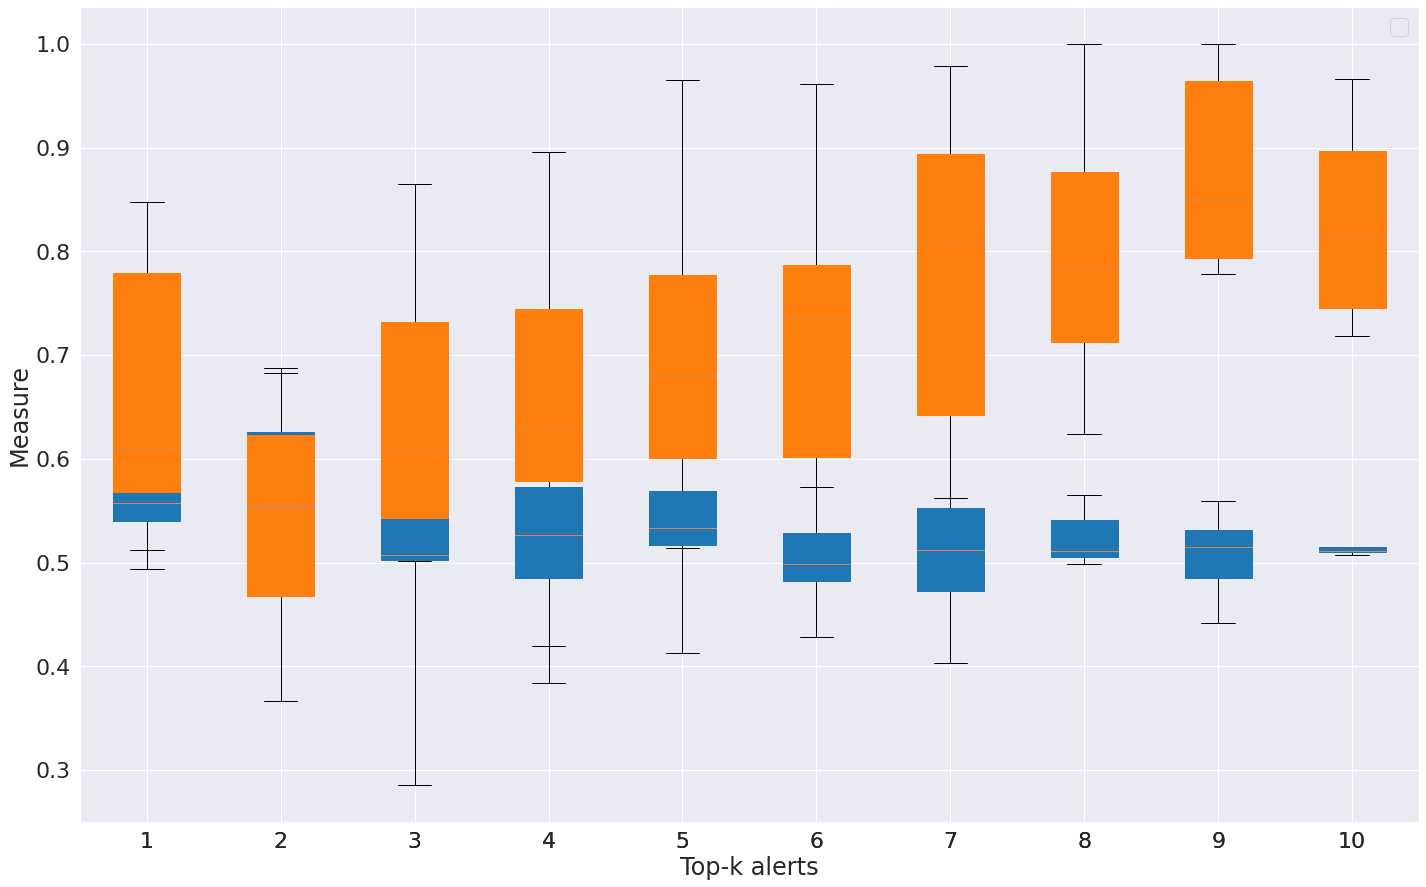

In [ ]:
ax =plt.boxplot(measures_dict['future_prediction_isj']['range_based_precision@k'], showfliers=False, patch_artist=True, boxprops=dict(facecolor='tab:blue', color='tab:blue'))
ax =plt.boxplot(measures_dict['future_prediction_isj']['range_based_recall@k'], showfliers=False, patch_artist=True, boxprops=dict(facecolor='tab:orange', color='tab:orange'))
plt.ylabel('Measure');plt.xlabel('Top-k alerts');plt.legend()